# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
data_concrete=pd.read_csv('/content/drive/MyDrive/DL_Assignments_PIAIC/DataSets/compresive_strength_concrete.csv')

In [68]:
data_concrete.shape

(1030, 9)

In [69]:
data_concrete.head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [70]:
data_concrete.isnull().any()

Cement (component 1)(kg in a m^3 mixture)                False
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    False
Fly Ash (component 3)(kg in a m^3 mixture)               False
Water  (component 4)(kg in a m^3 mixture)                False
Superplasticizer (component 5)(kg in a m^3 mixture)      False
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     False
Fine Aggregate (component 7)(kg in a m^3 mixture)        False
Age (day)                                                False
Concrete compressive strength(MPa, megapascals)          False
dtype: bool

In [71]:
np.where(data_concrete.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [72]:
X_train = data_concrete.sample(frac = 0.7, random_state = 123)
X_test = data_concrete.drop(X_train.index)

In [73]:
X_train.head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
134,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30
13,190.0,190.0,0.0,228.0,0.0,932.0,670.0,90,42.33
996,152.6,238.7,0.0,200.0,6.3,1001.8,683.9,28,26.86
770,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,3,14.99
937,313.3,0.0,113.0,178.5,8.0,1001.9,688.7,28,36.80
98,475.0,118.8,0.0,181.1,8.9,852.1,781.5,7,55.60
701,288.0,192.0,0.0,192.0,0.0,932.0,717.8,90,50.53
527,359.0,19.0,141.0,154.0,10.9,942.0,801.0,7,35.75
560,220.8,147.2,0.0,185.7,0.0,1055.0,744.3,28,25.75
656,200.0,133.0,0.0,192.0,0.0,965.4,806.2,3,11.41


## Feature Assigning

In [74]:
Y_train = X_train.iloc[:,-1]
X_train = X_train.iloc[:,0:-1]
Y_test = X_test.iloc[:,-1]
X_test = X_test.iloc[:,0:-1]

In [75]:
X_mean = X_train.mean()
X_train -= X_mean
X_std = X_train.std()
X_train /= X_std
X_test -= X_mean
X_test /= X_std

In [76]:
Y_mean = Y_train.mean()
Y_train -= Y_mean
Y_std = Y_train.std()
Y_train /= Y_std
Y_test -= Y_mean
Y_test /= Y_std

In [77]:
X_train.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                float64
dtype: object

In [78]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

# Building Model

In [79]:
from tensorflow.keras import layers 
from tensorflow.keras import models 
network = models.Sequential()
network.add(layers.Dense(10,activation="relu",input_shape=(X_train.shape[1],)))
network.add(layers.Dense(8,activation="relu"))
network.add(layers.Dense(6,activation="relu"))
network.add(layers.Dense(1))

In [80]:
network.compile(optimizer="rmsprop",loss=["mse"],metrics=["mae"])

In [81]:
history = network.fit(X_train,Y_train,epochs=200,validation_split=0.3, batch_size = 16)

Epoch 1/200
32/32 [==============================] - 1s 7ms/step - loss: 0.9304 - mae: 0.7829 - val_loss: 1.0006 - val_mae: 0.8232
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.8462 - mae: 0.7351 - val_loss: 0.9060 - val_mae: 0.7805
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7970 - mae: 0.7272 - val_loss: 0.8323 - val_mae: 0.7465
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - mae: 0.6747 - val_loss: 0.7522 - val_mae: 0.7065
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6488 - mae: 0.6496 - val_loss: 0.6819 - val_mae: 0.6679
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5249 - mae: 0.5919 - val_loss: 0.6223 - val_mae: 0.6333
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5562 - mae: 0.6052 - val_loss: 0.5754 - val_mae: 0.6102
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4544 - m

In [82]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [83]:
loss,mae=network.evaluate(X_test,Y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.1484 - mae: 0.2918


In [84]:
al_mae = history.history['val_mae']
val_loss = history.history['val_loss']

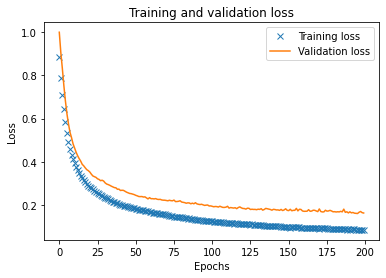

In [85]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(200)
plt.plot(epochs, loss_values, 'x', label='Training loss')
plt.plot(epochs, val_loss_values, '-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

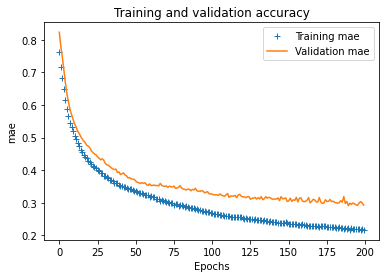

In [105]:
import matplotlib.pyplot as plt 
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, '+', label='Training mae')
plt.plot(epochs, val_acc_values, '-', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [87]:
y_pred = network.predict(X_test)
y_pred

array([[ 0.6140917 ],
       [ 0.81334233],
       [ 0.11030875],
       [-0.19515058],
       [ 0.06429711],
       [-0.21135466],
       [ 0.90480834],
       [ 0.56411487],
       [ 0.18815179],
       [-1.0606563 ],
       [ 0.3773021 ],
       [ 0.77744114],
       [ 0.6406183 ],
       [ 0.627991  ],
       [ 0.7548704 ],
       [ 0.70555735],
       [-0.3670528 ],
       [ 0.05940486],
       [ 1.4706137 ],
       [ 0.18543561],
       [ 0.3737836 ],
       [ 0.12425634],
       [-0.03290816],
       [ 0.12983398],
       [-0.03290816],
       [-0.13217345],
       [ 0.45226055],
       [ 0.64060897],
       [ 0.23297147],
       [ 0.12151359],
       [ 0.23297139],
       [ 0.23297139],
       [ 0.9728552 ],
       [ 0.68992484],
       [ 1.192037  ],
       [ 1.8565493 ],
       [ 1.4700149 ],
       [ 2.0911222 ],
       [ 1.4923961 ],
       [ 1.8565493 ],
       [ 2.242729  ],
       [ 1.7045528 ],
       [ 1.6070981 ],
       [ 1.8419803 ],
       [ 1.6070981 ],
       [ 1

In [88]:
def denorm(x):
    return (x * Y_std) + Y_mean

In [89]:

y_pred = denorm(y_pred)
y_pred

array([[46.07152  ],
       [49.432007 ],
       [37.57491  ],
       [32.423145 ],
       [36.798893 ],
       [32.149853 ],
       [50.97464  ],
       [45.22863  ],
       [38.88778  ],
       [17.82585  ],
       [42.07792  ],
       [48.82651  ],
       [46.51891  ],
       [46.305943 ],
       [48.445843 ],
       [47.614147 ],
       [29.523907 ],
       [36.71638  ],
       [60.517303 ],
       [38.84197  ],
       [42.018574 ],
       [37.810143 ],
       [35.159466 ],
       [37.904213 ],
       [35.159466 ],
       [33.485294 ],
       [43.34214  ],
       [46.518753 ],
       [39.643692 ],
       [37.763885 ],
       [39.64369  ],
       [39.64369  ],
       [52.12229  ],
       [47.350494 ],
       [55.81893  ],
       [67.026344 ],
       [60.507202 ],
       [70.98256  ],
       [60.884674 ],
       [67.026344 ],
       [73.539505 ],
       [64.46283  ],
       [62.8192   ],
       [66.78063  ],
       [62.8192   ],
       [62.8192   ],
       [78.0355   ],
       [65.96

In [90]:
y_true = denorm(Y_test)
y_true

array([40.27, 41.05, 45.85, 38.07, 47.81, 39.36, 56.14, 36.25, 41.54,
       15.05, 40.76, 46.93, 41.93, 50.95, 54.38, 55.06, 30.28, 40.86,
       71.99, 36.3 , 40.2 , 33.4 , 35.3 , 24.4 , 35.3 , 24.1 , 46.8 ,
       54.9 , 55.9 , 47.1 , 55.9 , 55.9 , 56.1 , 59.09, 60.29, 71.3 ,
       74.7 , 66.  , 74.5 , 71.3 , 63.4 , 64.9 , 64.3 , 60.2 , 64.3 ,
       64.3 , 77.3 , 54.9 , 71.7 , 70.7 , 56.5 , 73.3 , 24.89, 29.45,
       34.56, 12.45, 33.96, 37.34, 24.9 , 34.2 , 39.61, 35.34, 22.72,
       40.39, 25.48, 28.63,  7.75, 17.82, 49.97, 19.93, 39.59, 29.22,
       42.35, 26.31, 42.55, 13.33, 44.4 , 31.35, 33.73, 32.66, 21.5 ,
       48.67, 31.12, 34.74, 23.14, 41.89, 48.72, 33.36, 15.36, 30.85,
       42.03, 51.06, 21.78, 42.29, 56.85, 21.91, 36.99, 47.4 , 51.96,
       30.45, 47.71, 66.82, 66.95, 27.42, 35.96, 18.02, 38.6 , 30.22,
       36.3 , 57.23, 78.8 , 60.28, 39.38, 44.33, 52.3 , 58.52, 69.84,
       19.42, 14.94, 21.29, 23.08, 15.52, 11.98, 16.88, 33.09, 31.81,
       33.01, 24.66,

In [91]:
y_pred = y_pred.flatten()
y_pred

array([46.07152  , 49.432007 , 37.57491  , 32.423145 , 36.798893 ,
       32.149853 , 50.97464  , 45.22863  , 38.88778  , 17.82585  ,
       42.07792  , 48.82651  , 46.51891  , 46.305943 , 48.445843 ,
       47.614147 , 29.523907 , 36.71638  , 60.517303 , 38.84197  ,
       42.018574 , 37.810143 , 35.159466 , 37.904213 , 35.159466 ,
       33.485294 , 43.34214  , 46.518753 , 39.643692 , 37.763885 ,
       39.64369  , 39.64369  , 52.12229  , 47.350494 , 55.81893  ,
       67.026344 , 60.507202 , 70.98256  , 60.884674 , 67.026344 ,
       73.539505 , 64.46283  , 62.8192   , 66.78063  , 62.8192   ,
       62.8192   , 78.0355   , 65.96881  , 75.583694 , 72.144104 ,
       76.48361  , 81.07147  , 25.673843 , 35.60484  , 45.54476  ,
       14.833387 , 41.482815 , 44.313675 , 30.38382  , 40.53188  ,
       47.27413  , 44.589897 , 23.214808 , 50.956802 , 17.623964 ,
       38.613724 , 20.833601 , 25.99097  , 48.646503 , 11.249205 ,
       41.820328 , 31.602707 , 44.406372 , 24.761751 , 44.3751

In [92]:
y_pred.shape

(309,)

In [93]:
y_true.shape

(309,)

(0.0, 100.0)

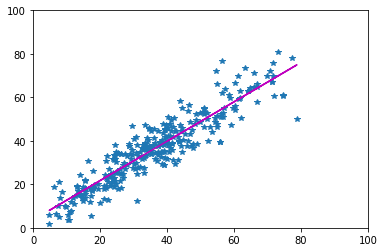

In [94]:
c = np.polyfit(y_true,y_pred,1)
poly1d_fn = np.poly1d(c) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(y_true,y_pred, '*', y_true, poly1d_fn(y_true), '-m')
plt.xlim(0, 100)
plt.ylim(0, 100)